Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'/Users/veronikalomonosova/Downloads/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


/Users/veronikalomonosova/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# ANOM_2
## OCSVM

In [3]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')
ind = 390482
before = 2
after = 3

In [4]:
anom.loc[ind - 730 * before + 10 * 3 + 6:ind + 720 * after]

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
389058,2022-02-07 00:32:59,5f33e3c7fb3bbc2c40fb6afe,"[226.153,227.056,226.377]","[0.2,0.2,0.2]","[6.06,10,5.69]","[18324.56045,24349.96072,19463.81168]","[226.80844,2028.58652,110.92579]","[19154.5646,25450.34286,20263.9787]","[282.2416,3164.9507,2130.6474]",21.75,...,"[19154.5646,25450.34286,20263.9787]","[282.2416,3164.9507,2130.6474]",23.13,62138.33285,2366.32075,64868.88616,5577.8396999999995,"[-82.9,-78.8,-83.1]","[0,-120.1,119.7]",49.98
389059,2022-02-07 00:34:59,5f33e3c7fb3bbc2c40fb6afe,"[225.588,226.757,226.201]","[0.2,0.2,0.2]","[5.94,9.25,6.63]","[18324.56066,24349.96105,19463.81189]","[226.80844,2028.58652,110.92579]","[19154.56627,25450.34459,20263.9805]","[282.2416,3164.9507,2130.6474]",21.82,...,"[19154.56627,25450.34459,20263.9805]","[282.2416,3164.9507,2130.6474]",22.88,62138.3336,2366.32075,64868.89136000001,5577.8396999999995,"[-82.9,-78.9,-83.3]","[0,-120,119.7]",49.98
389060,2022-02-07 00:36:59,5f33e3c7fb3bbc2c40fb6afe,"[226.107,226.902,226.405]","[0.2,0.2,0.2]","[6.06,9.81,5.88]","[18324.56086,24349.96138,19463.81209]","[226.80844,2028.58652,110.92579]","[19154.56788,25450.34628,20263.98223]","[282.2416,3164.9507,2130.6474]",21.75,...,"[19154.56788,25450.34628,20263.98223]","[282.2416,3164.9507,2130.6474]",23.31,62138.33433,2366.32075,64868.89639,5577.8396999999995,"[-82.7,-78.7,-83.2]","[0,-120,119.8]",50.01
389061,2022-02-07 00:38:59,5f33e3c7fb3bbc2c40fb6afe,"[225.992,226.585,226.313]","[0.2,0.2,0.2]","[6.19,10,5.5]","[18324.56106,24349.96171,19463.81228]","[226.80844,2028.58652,110.92579]","[19154.56949,25450.34797,20263.98396]","[282.2416,3164.9507,2130.6474]",21.69,...,"[19154.56949,25450.34797,20263.98396]","[282.2416,3164.9507,2130.6474]",23.25,62138.33505,2366.32075,64868.901419999995,5577.8396999999995,"[-82.7,-78.6,-83.2]","[0,-120,119.8]",49.99
389062,2022-02-07 00:40:59,5f33e3c7fb3bbc2c40fb6afe,"[225.831,226.584,226.227]","[0.2,0.2,0.2]","[6.19,10.06,5.5]","[18324.56127,24349.96203,19463.81247]","[226.80844,2028.58652,110.92579]","[19154.57112,25450.34968,20263.98571]","[282.2416,3164.9507,2130.6474]",21.75,...,"[19154.57112,25450.34968,20263.98571]","[282.2416,3164.9507,2130.6474]",23.37,62138.33577,2366.32075,64868.90651,5577.8396999999995,"[-82.8,-78.5,-83.5]","[0,-119.9,119.9]",49.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392638,2022-02-11 23:56:38,5f33e3c7fb3bbc2c40fb6afe,"[225.533,226.143,225.901]","[0.2,0.2,0.2]","[6.13,7.69,8.06]","[18650.97065,24719.92967,19674.96452]","[292.74594,2032.63017,110.97596]","[19497.84836,25836.73822,20480.44507]","[357.9721,3175.7277,2145.5022]",21.88,...,"[19497.84836,25836.73822,20480.44507]","[357.9721,3175.7277,2145.5022]",23.2,63045.86484,2436.3520700000004,65815.03165,5679.201999999999,"[-83.1,-80.4,-81.2]","[0,-120.1,119.8]",49.99
392639,2022-02-11 23:58:38,5f33e3c7fb3bbc2c40fb6afe,"[225.476,226.086,225.657]","[0.2,0.2,0.2]","[6.13,8.63,7.06]","[18650.97085,24719.92994,19674.96478]","[292.74594,2032.63017,110.97596]","[19497.85005,25836.7398,20480.44684]","[357.9721,3175.7277,2145.5022]",21.82,...,"[19497.85005,25836.7398,20480.44684]","[357.9721,3175.7277,2145.5022]",23.57,63045.86557,2436.3520700000004,65815.03669000001,5679.201999999999,"[-83,-80.1,-81.2]","[0,-120,119.9]",49.99
392640,2022-02-12 00:00:38,5f33e3c7fb3bbc2c40fb6afe,"[225.446,226.469,225.85]","[0.2,0.2,0.2]","[6.25,9.5,6.13]","[18650.97106,24719.93022,19674.965]","[292.74594,2032.63017,110.97596]","[19497.85164,25836.74138,20480.44854]","[357.9721,3175.7277,2145.5022]",21.88,...,"[19497.85164,25836.74138,20480.44854]","[357.9721,3175.7277,2145.5022]",23.38,63045.86628,2436.3520700000004,65815.04156,5679.201999999999,"[-82.7,-79.1,-82.2]","[0,-120.1,119.7]",49.98
392641,2022-02-12 00:02:3

### Оригинальные данные, одна размерность, без EMD
Трейн на всех

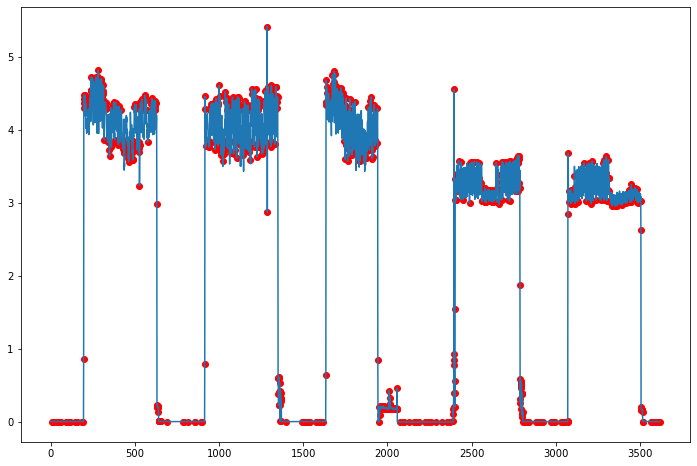

In [5]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]

model = IsolationForest(random_state=0) 
model.fit(df)
preds = model.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


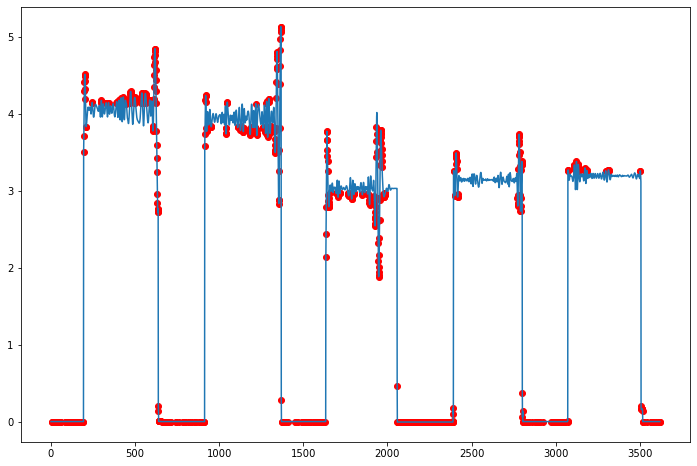

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

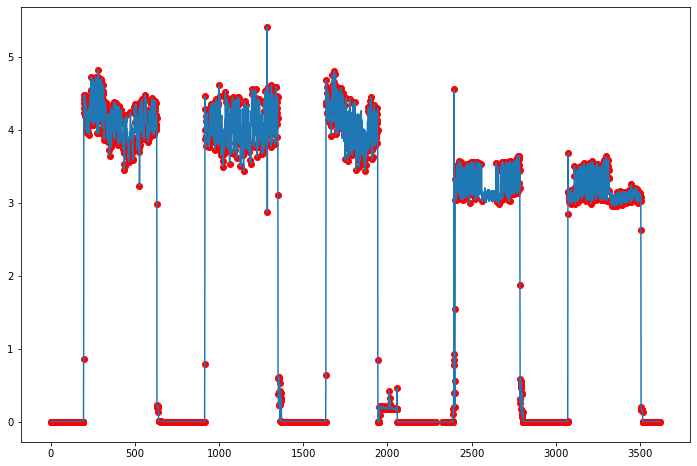

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


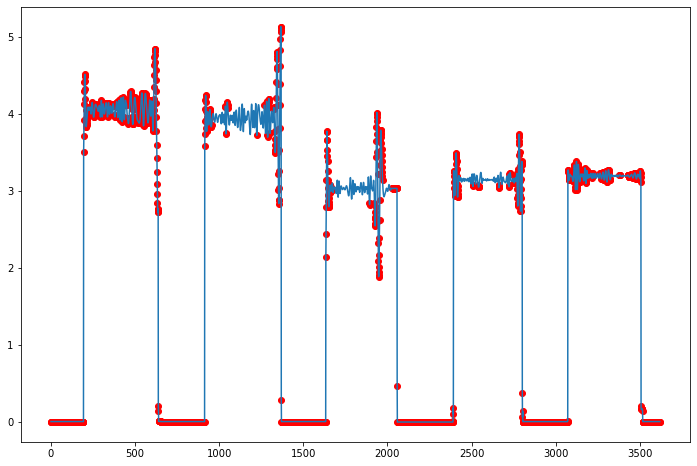

In [8]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

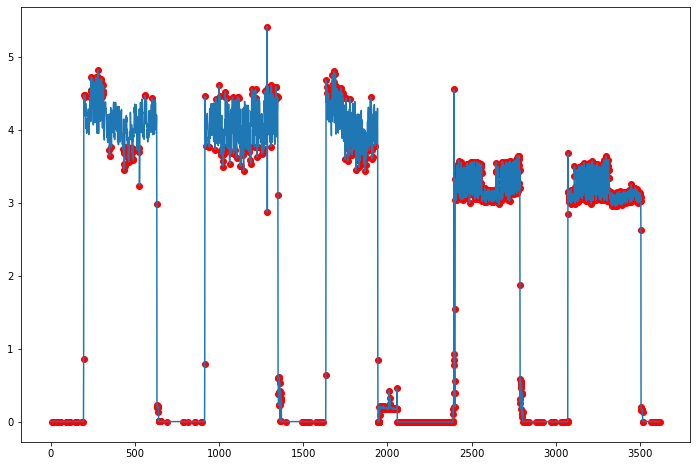

In [11]:
df = get_data(anom.loc[ind - 730 * before :ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

739
0 739
195 639 0
1459
739 1459
915 1370 1
739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


2394 2803 3
3617
2897 3617
3074 3509 4


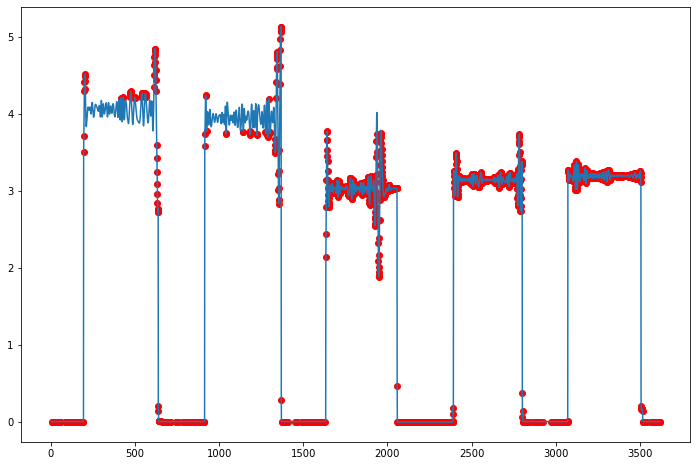

In [13]:
df = get_data(anom.loc[ind - 730 * (before):ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * (before):ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

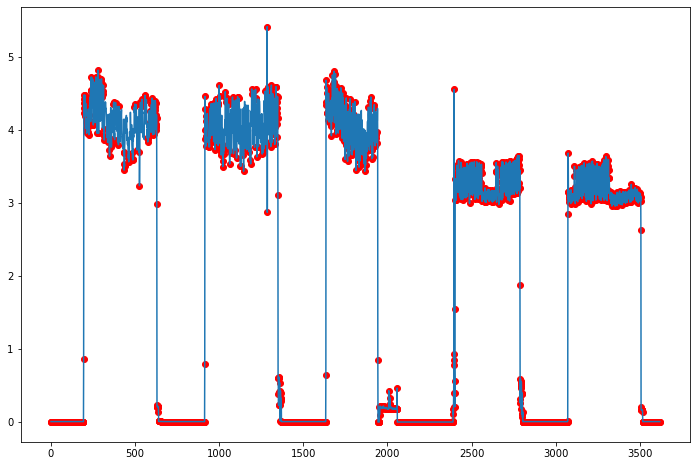

In [14]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

739
0 739
195 639 0
1459
739 1459
915 1370 1
739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


2394 2803 3
3617
2897 3617
3074 3509 4


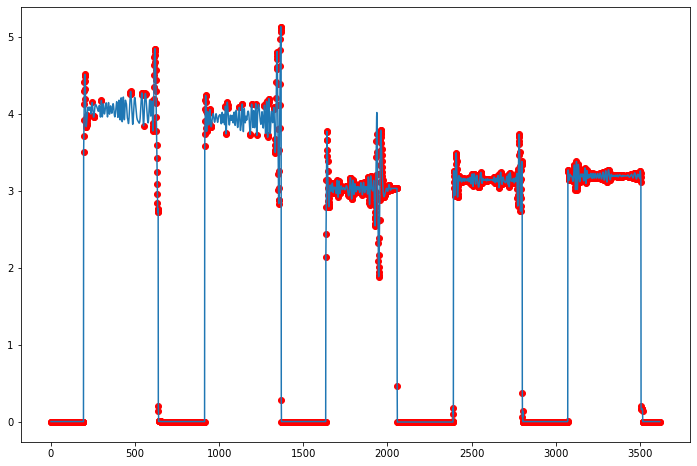

In [15]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
ocsvm.fit(df)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


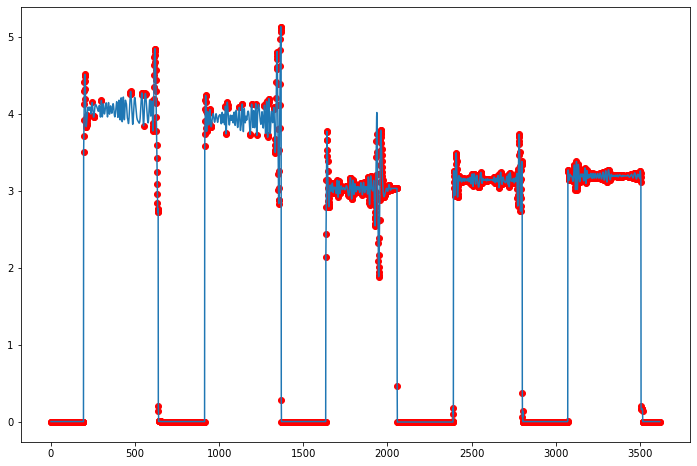

In [16]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4


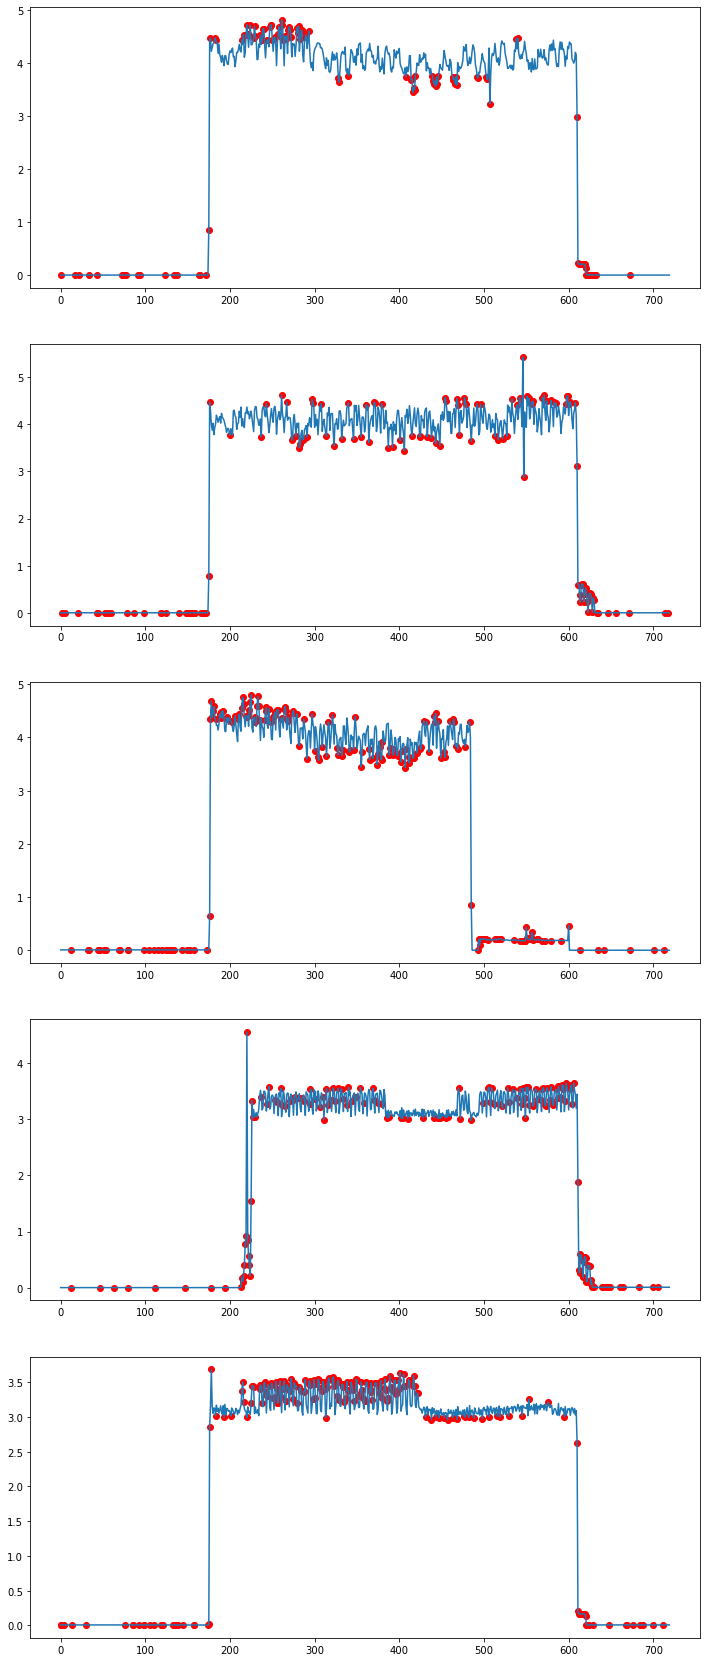

In [17]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4
[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4
(5, 720)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


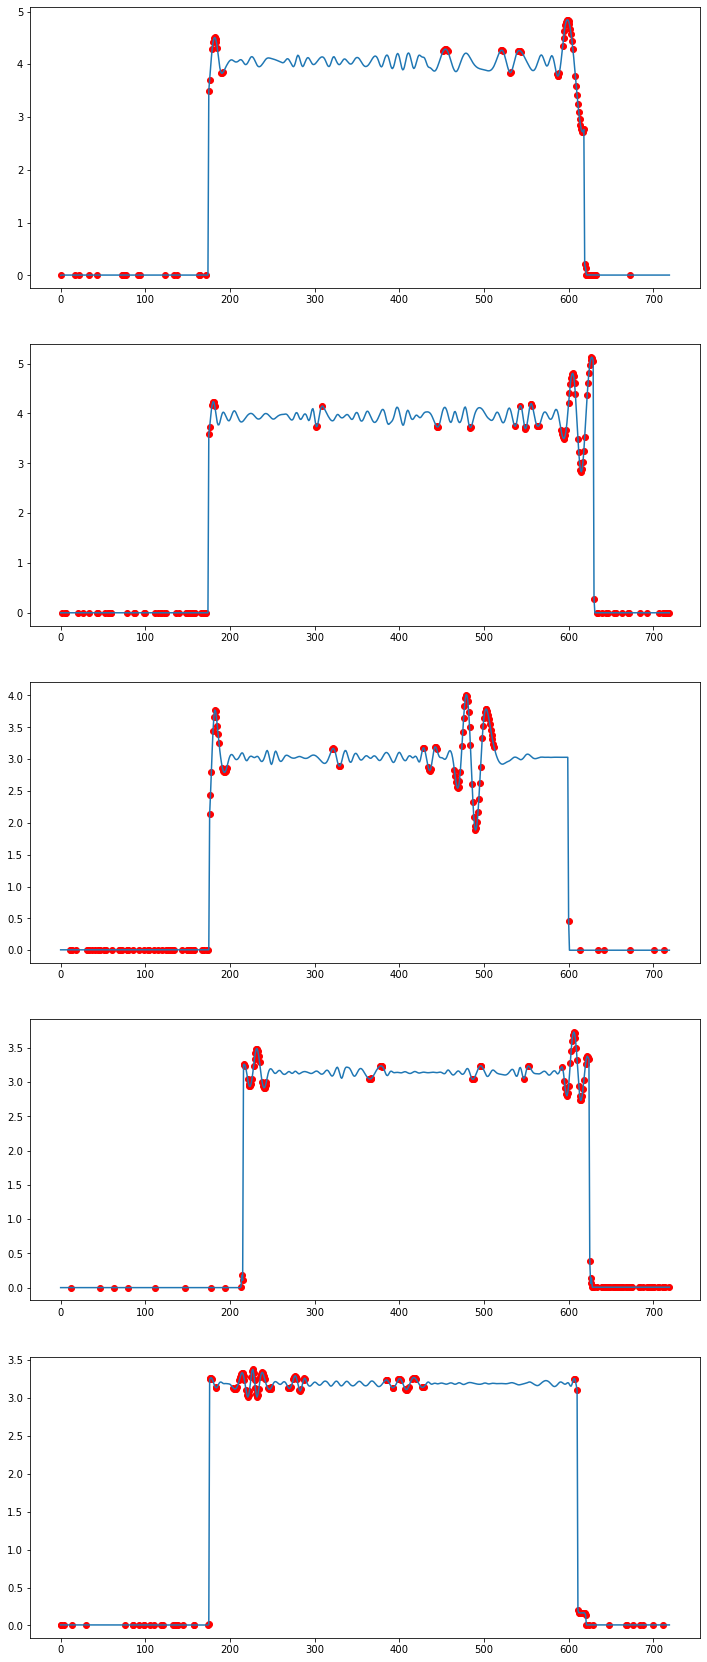

In [18]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(5, 720, 5)


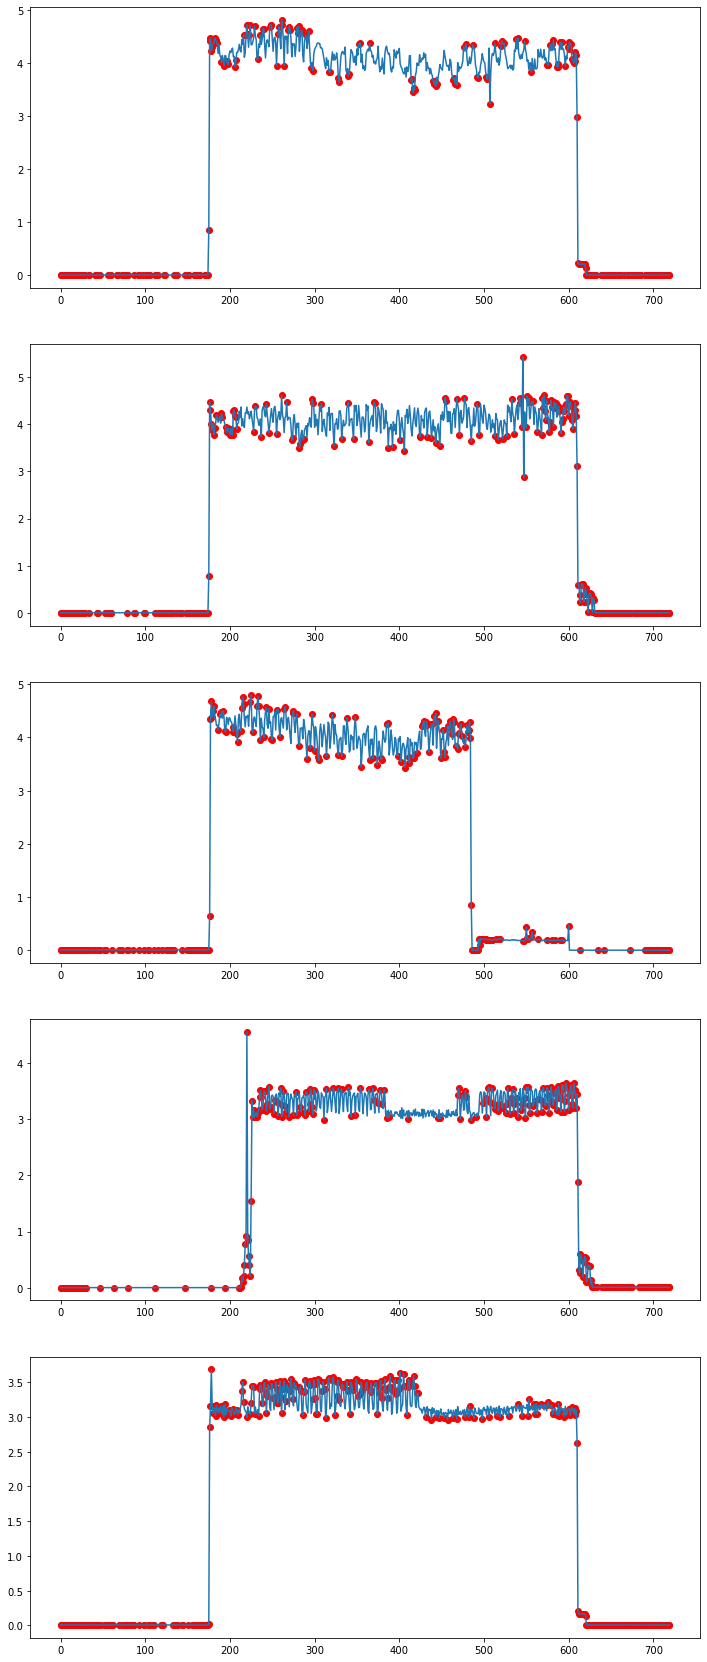

In [19]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4
(5, 720, 5)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


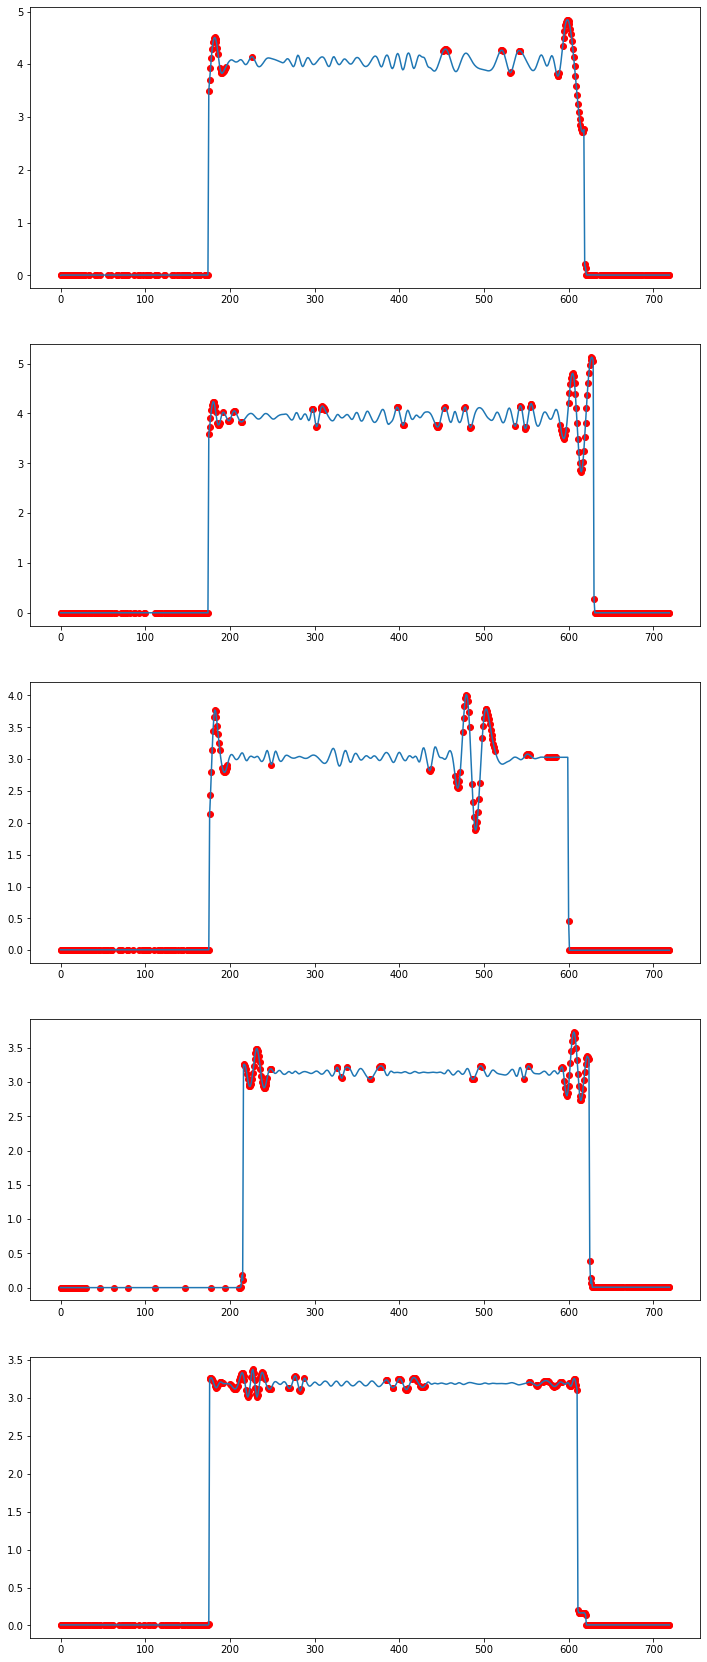

In [20]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[  19  739 1459]
19 739 0
739 1459 1
(2, 720)
[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4


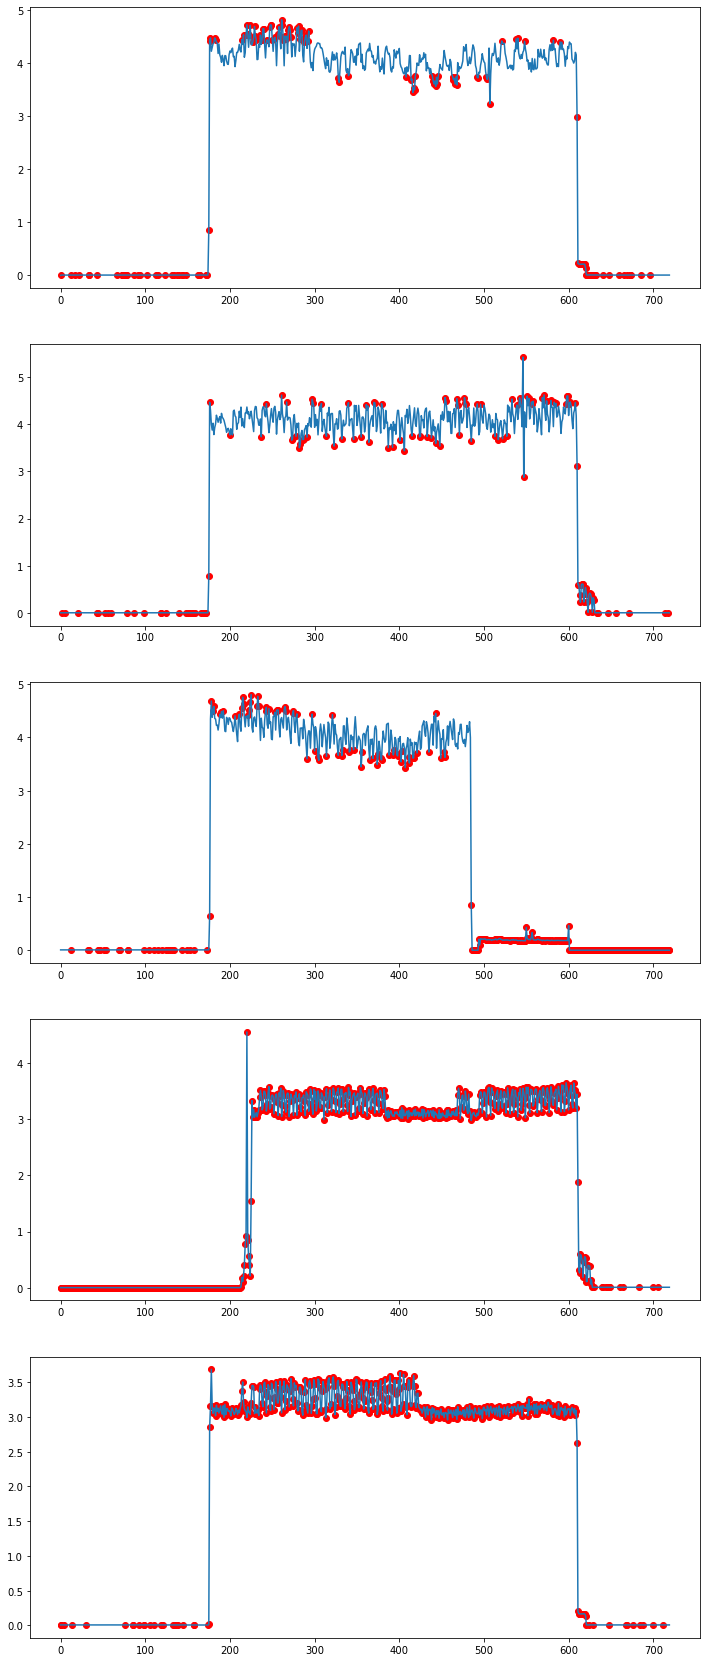

In [22]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

739
0 739
195 639 0
1459
739 1459
915 1370 1
[  19  739 1459]
19 739 0
739 1459 1
(2, 720)


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


739
0 739
195 639 0
1459
739 1459
915 1370 1
[  19  739 1459]
19 739 0
739 1459 1


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


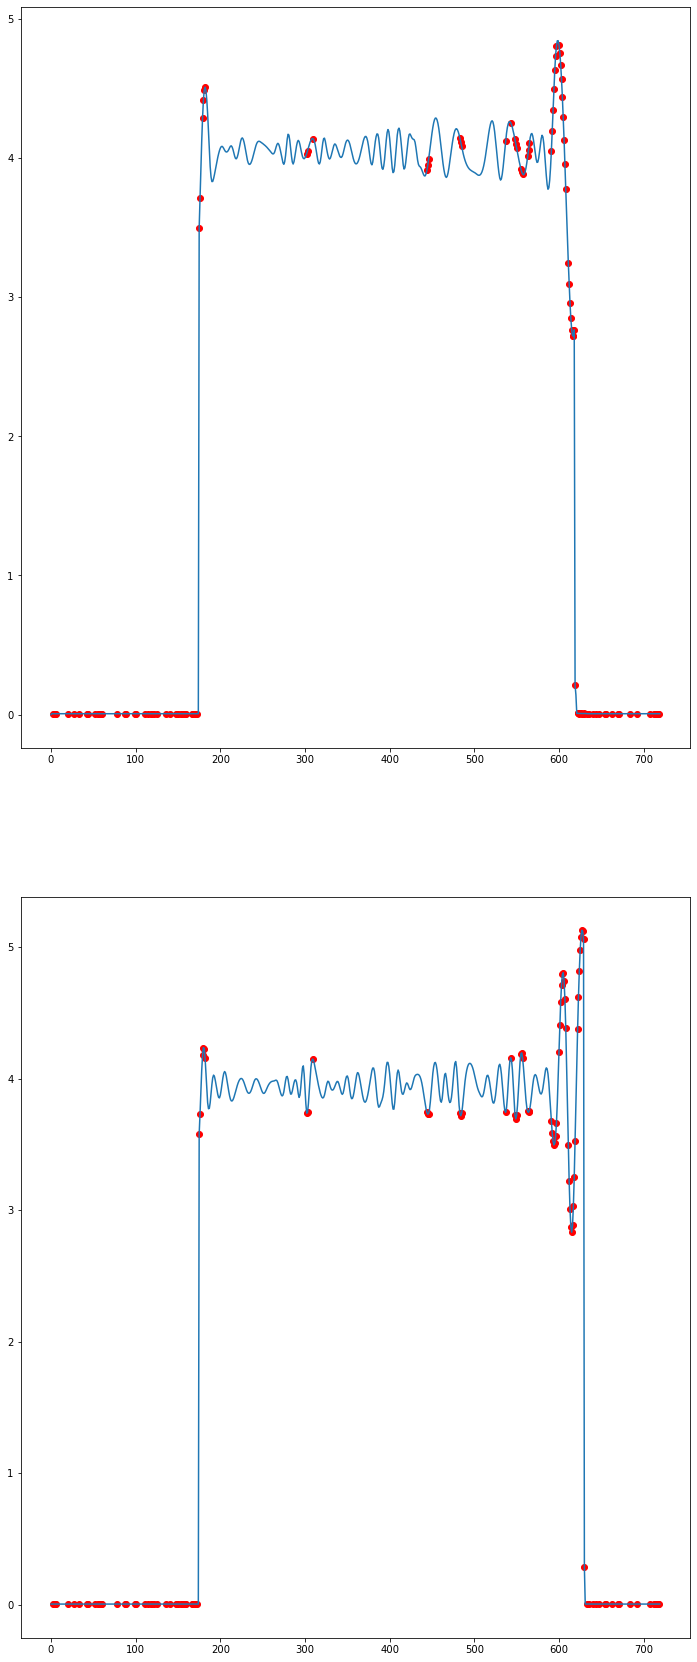

In [23]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4


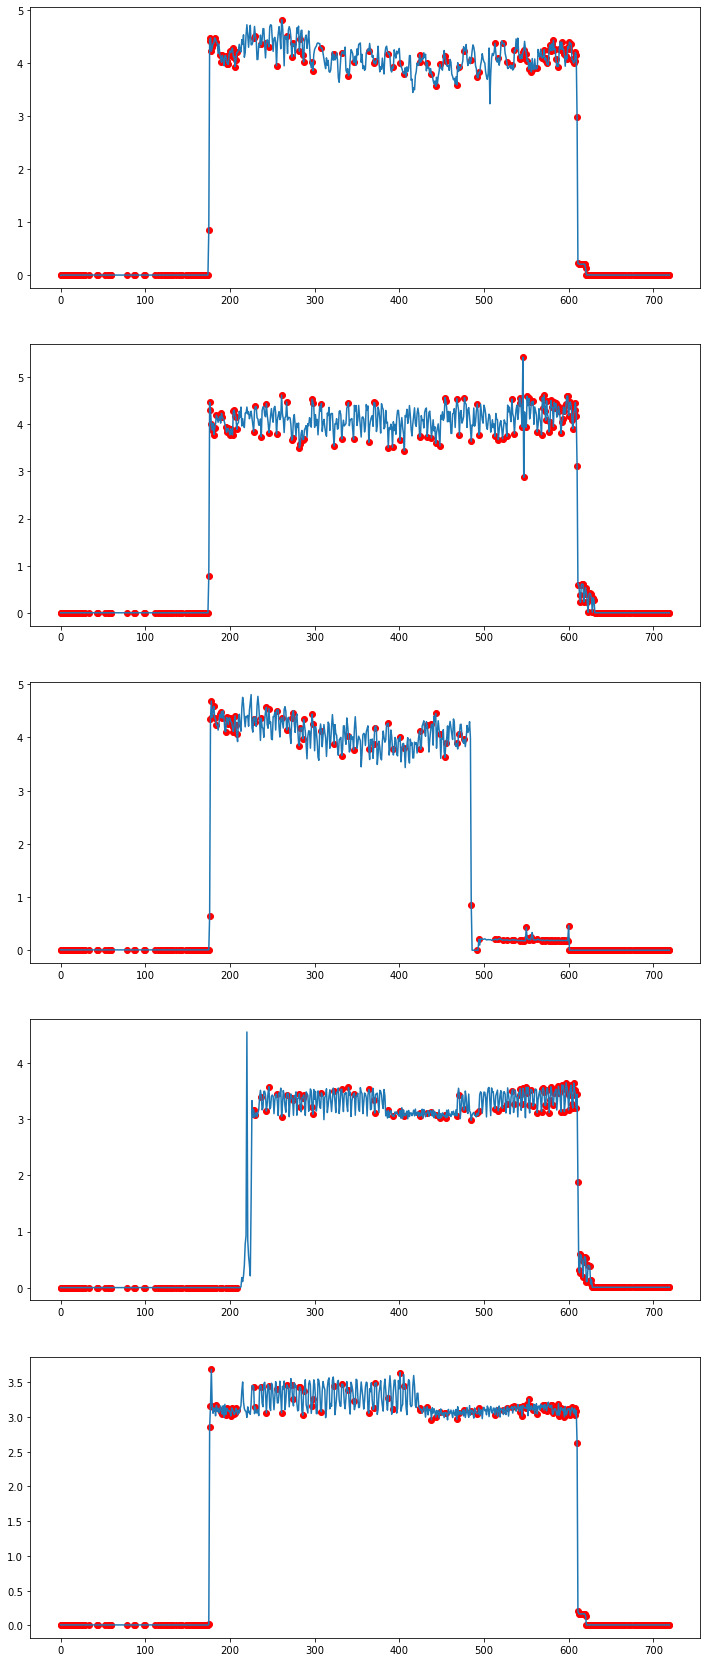

In [24]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

739
0 739
195 639 0
1459
739 1459
915 1370 1


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


739
0 739
195 639 0
1459
739 1459
915 1370 1
2178
1459 2178
1635 2059 2
2897
2178 2897
2394 2803 3
3617
2897 3617
3074 3509 4
[  19  739 1459 2178 2897 3617]
19 739 0
739 1459 1
1459 2178 2
2178 2897 3
2897 3617 4


/Users/veronikalomonosova/Documents/GitHub/diploma/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


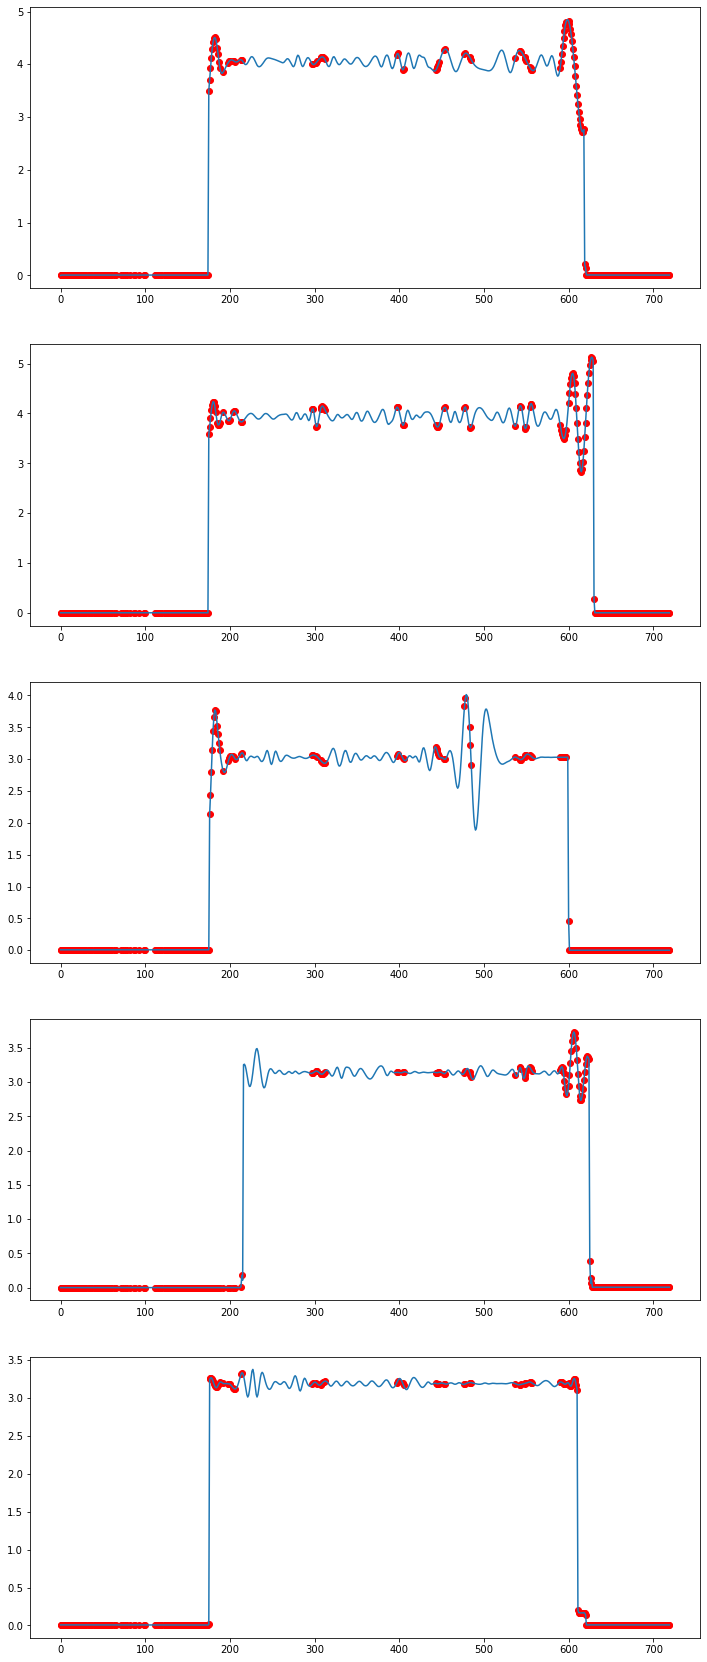

In [25]:
df = get_data(anom.loc[ind - 730 * before:ind + 720 * 0].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = IsolationForest(random_state=0) 
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 2)
Трейн на норм

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 5)
Трейн на норм

In [ ]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, no EMD (интервал 15)
Трейн на норм

[  19  739 1459]
720
720
[  19  739 1459 2178 2897 3617]
720
720
SMALL
3621
720
SMALL
3621
720
720
[1 1 1 1 1]


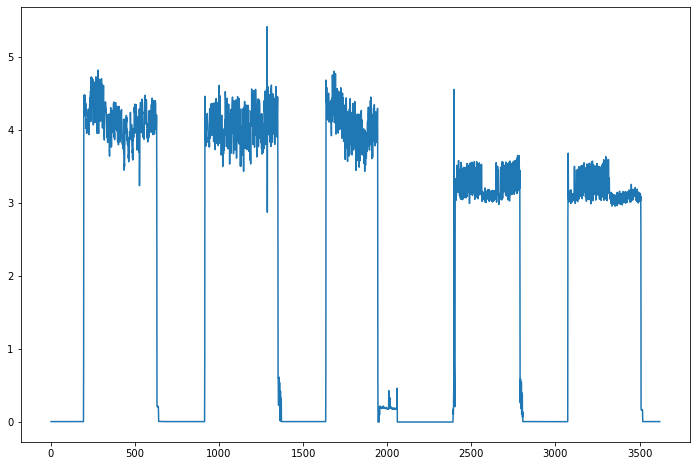

In [7]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=False, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, c EMD (интервал 2)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  19  739 1459]
720
720


/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  19  739 1459 2178 2897 3617]
720
720
SMALL
3621
720
SMALL
3621
720
720
[1 1 1 1 1]


/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


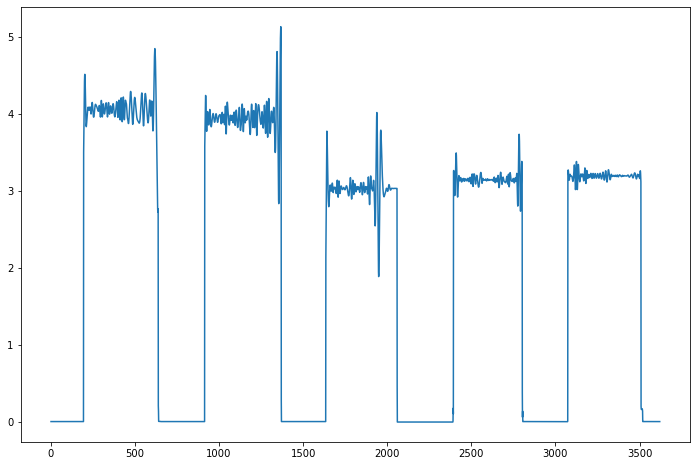

In [4]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=2)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, c EMD (интервал 5)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  19  739 1459]
720
720


/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  19  739 1459 2178 2897 3617]
720
720
SMALL
3621
720
SMALL
3621
720
720
[1 1 1 1 1]


/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


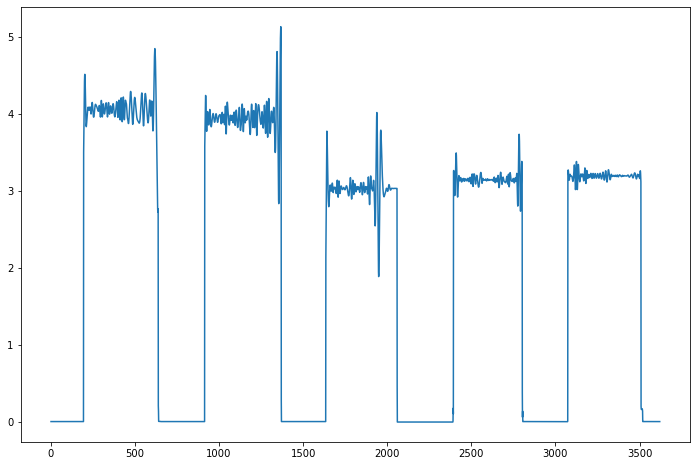

In [5]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=5)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')

In [ ]:
### Суточные данные, бинарная мульти размерность, c EMD (интервал 15)
Трейн на норм

/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


[  19  739 1459]
720
720
[  19  739 1459 2178 2897 3617]
720
720
SMALL
3621
720
SMALL
3621
720
720
[1 1 1 1 1]


/Users/veronikalomonosova/Documents/GitHub/diploma/IF/data_preparation.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


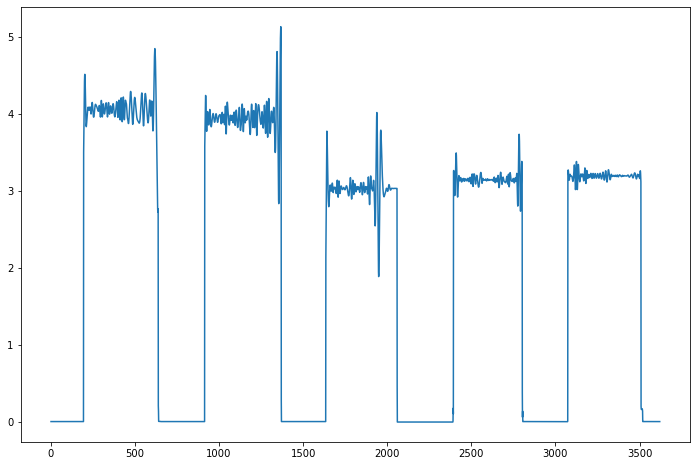

In [6]:
df = get_data(anom.loc[ind - 730 * before:ind].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
nu=0.05
ocsvm = IsolationForest(random_state=0)
ocsvm.fit(df)
df = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi_intervals', intervals=15)#[1:]
preds = ocsvm.predict(df)
print(preds)
data = []
for i in df:
    data += i[:720].tolist()
data = np.array(data)
plt.figure(figsize=(12, 8))
data = get_data(anom.loc[ind - 730 * before:ind + 720 * after].reset_index(drop=True), \
              mode='original', emd=True, dimension='one', intervals=2)
plt.plot(np.arange(len(data)), data, zorder=0)
for i in range(len(preds)):
    if preds[i] != 1:
        plt.plot(np.arange(i * 720, (i + 1)*720), data[i * 720: (i + 1)*720], zorder=0, color='red')